# TASK 3

# PREDICTIVE MODELING WITH LINEAR REGRESSION

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay ,f1_score, precision_score, recall_score

In [74]:
data = pd.read_csv('C:/Users/Admin/Desktop/CodeAlpha/IPL IMB381IPL2013.csv')
data

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


In [75]:
x = data.iloc[:,9:13].values
print(x)

[[  0.     0.     0.     0.  ]
 [ 71.41 185.    37.6    0.  ]
 [ 80.62 288.    32.9    0.  ]
 [ 84.56  51.    36.8    0.  ]
 [ 45.93   0.     0.     0.  ]
 [ 72.26   0.     0.     1.  ]
 [ 78.94  34.    42.5    0.  ]
 [ 92.59  62.    31.3    0.  ]
 [ 85.77  72.    53.     1.  ]
 [ 84.76   0.     0.     1.  ]
 [ 81.39 142.    34.1    0.  ]
 [ 70.74  14.    52.8    1.  ]
 [ 65.51  32.    41.     0.  ]
 [ 93.19   0.     0.     1.  ]
 [ 56.09   0.     0.     0.  ]
 [ 88.19   1.    12.     1.  ]
 [ 86.8   67.    58.3    1.  ]
 [ 60.     5.    61.4    0.  ]
 [ 71.24   4.    46.5    1.  ]
 [ 84.    25.    47.6    0.  ]
 [ 45.62  60.    35.6    0.  ]
 [ 60.96 187.    34.7    0.  ]
 [ 71.49   1.    29.     1.  ]
 [ 88.82 169.    33.2    1.  ]
 [ 86.17   0.     0.     1.  ]
 [ 73.7  100.    45.6    1.  ]
 [ 83.95 156.    44.4    1.  ]
 [ 83.26   0.     0.     1.  ]
 [ 96.94   0.     0.     1.  ]
 [  0.     2.    39.     0.  ]
 [ 80.51 259.    46.5    1.  ]
 [100.    44.    23.4    0.  ]
 [ 78.96

In [76]:
y = data.iloc[:,4].values
print(y)

['KXIP' 'RCB' 'KKR' 'CSK' 'CSK' 'CSK' 'CSK+' 'CSK' 'RR' 'RCB+' 'MI+' 'RCB'
 'KXIP' 'DD+' 'MI+' 'CSK' 'DD+' 'KKR+' 'RCB+' 'MI+' 'DC' 'MI' 'CSK' 'CSK'
 'DD+' 'KKR+' 'KKR+' 'DC' 'DC+' 'CSK+' 'MI' 'DC+' 'CSK' 'RR' 'KKR+' 'KKR+'
 'KXIP' 'KKR+' 'CSK' 'RR+' 'RCB' 'MI' 'KXIP+' 'RR+' 'RCB' 'RR' 'RR+' 'DD+'
 'KKR+' 'KXIP' 'RCB' 'RCB+' 'RCB' 'KKR+' 'DC+' 'KXI+' 'DD' 'MI' 'RR+'
 'KKR+' 'KKR+' 'DD+' 'DD' 'RCB' 'DD+' 'RCB' 'DD' 'CSK' 'RR+' 'CSK+' 'DD+'
 'MI+' 'DD+' 'RCB' 'CSK' 'RR+' 'DC+' 'CSK+' 'RCB+' 'RR+' 'CSK+' 'KXIP+'
 'RR+' 'RCB+' 'MI' 'KXIP+' 'KKR' 'KXIP+' 'CSK' 'RCB+' 'KKR+' 'KXIP+'
 'KXIP' 'DD' 'DC' 'KKR+' 'CSK' 'DC+' 'KKR' 'DD' 'DC' 'DC+' 'DC+' 'RR+'
 'RR' 'KXIP+' 'RCB+' 'DC+' 'DC+' 'KKR' 'RCB+' 'MI' 'DD+' 'MI+' 'CSK' 'KKR'
 'RCB+' 'DC' 'RCB+' 'DC+' 'DD+' 'RCB+' 'RR' 'DD' 'RCB+' 'DC' 'RR' 'KXIP+'
 'MI+' 'DC']


In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=108)
x_train

array([[ 72.97, 270.  ,  39.3 ,   1.  ],
       [ 80.62, 288.  ,  32.9 ,   0.  ],
       [ 83.95, 156.  ,  44.4 ,   1.  ],
       [ 78.96, 165.  ,  34.  ,   0.  ],
       [ 93.71,  67.  ,  47.1 ,   0.  ],
       [ 89.72,  11.  ,  34.8 ,   0.  ],
       [ 91.4 ,  18.  ,  36.2 ,   0.  ],
       [ 86.76,   7.  ,  57.1 ,   1.  ],
       [ 70.4 ,   1.  ,  42.  ,   0.  ],
       [ 81.93, 282.  ,  45.7 ,   1.  ],
       [ 75.1 ,   0.  ,   0.  ,   1.  ],
       [ 78.96,   0.  ,   0.  ,   0.  ],
       [ 73.57,  91.  ,  33.7 ,   0.  ],
       [ 34.05,  64.  ,  33.6 ,   0.  ],
       [ 75.68,   1.  ,  60.  ,   0.  ],
       [ 86.23, 154.  ,  52.2 ,   1.  ],
       [ 67.58,   2.  ,  42.  ,   1.  ],
       [ 87.51,   1.  ,  66.  ,   0.  ],
       [ 71.49,   1.  ,  29.  ,   1.  ],
       [ 70.74,  14.  ,  52.8 ,   1.  ],
       [ 91.21, 323.  ,  46.  ,   1.  ],
       [ 87.5 ,   0.  ,   0.  ,   0.  ],
       [ 50.  ,   3.  ,  55.  ,   0.  ],
       [ 89.62,   0.  ,   0.  ,   1.  ],
       [ 34.  , 

In [78]:
x_test

array([[ 72.04, 293.  ,  36.3 ,   1.  ],
       [ 60.96, 187.  ,  34.7 ,   0.  ],
       [ 65.51,  32.  ,  41.  ,   0.  ],
       [  0.  ,   2.  ,  39.  ,   0.  ],
       [ 93.19,   0.  ,   0.  ,   1.  ],
       [ 79.41, 137.  ,  44.6 ,   0.  ],
       [ 69.04, 154.  ,  32.2 ,   0.  ],
       [ 57.31, 157.  ,  36.6 ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ],
       [ 78.08,   7.  ,  83.1 ,   1.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ],
       [ 72.26,   0.  ,   0.  ,   1.  ],
       [ 61.06, 337.  ,  43.  ,   1.  ],
       [ 71.24,   4.  ,  46.5 ,   1.  ],
       [ 81.39, 142.  ,  34.1 ,   0.  ],
       [ 71.23,   0.  ,   0.  ,   1.  ],
       [ 77.56, 534.  ,  35.2 ,   0.  ],
       [ 60.  ,   1.  ,  90.  ,   0.  ],
       [ 84.  ,  25.  ,  47.6 ,   0.  ],
       [ 80.51, 259.  ,  46.5 ,   1.  ],
       [ 70.78,  37.  ,  51.5 ,   0.  ],
       [ 86.8 ,  67.  ,  58.3 ,   1.  ],
       [ 68.74,   0.  ,   0.  ,   0.  ],
       [100.  , 

In [79]:
y_train

array(['RCB', 'KKR', 'KKR+', 'KXIP+', 'KXIP', 'RCB+', 'KKR+', 'RCB+',
       'DC', 'DD+', 'RCB', 'CSK', 'RCB+', 'KKR+', 'DD+', 'MI', 'KKR',
       'KKR+', 'CSK', 'RCB', 'MI', 'MI+', 'CSK', 'KKR+', 'DD', 'DC',
       'RCB+', 'CSK', 'KXIP+', 'DC+', 'CSK', 'RCB', 'DC+', 'CSK+', 'RR',
       'DD+', 'RCB+', 'DC', 'KKR+', 'RR+', 'RR', 'CSK', 'RCB', 'MI',
       'RR+', 'DC+', 'RR', 'DD+', 'CSK', 'DD+', 'DC+', 'RR', 'MI', 'DC',
       'KKR+', 'RR+', 'RCB+', 'KXIP+', 'RCB', 'RR+', 'CSK', 'CSK',
       'KXIP+', 'DC', 'RCB+', 'DC+', 'KKR', 'DD', 'KKR+', 'MI+', 'RR+',
       'KXIP+', 'DD+', 'MI+', 'RR+', 'CSK', 'CSK', 'DD', 'DD', 'DD+',
       'RR', 'KXI+', 'KXIP', 'DC+', 'CSK+', 'MI+', 'DC+', 'CSK', 'RCB',
       'DC+', 'RCB+', 'DD', 'CSK+', 'KKR+', 'KXIP+', 'RCB', 'RCB+', 'RR+',
       'KKR', 'RCB+', 'RR+', 'KKR+', 'CSK', 'DD'], dtype=object)

In [80]:
y_test

array(['RR', 'MI', 'KXIP', 'CSK+', 'DD+', 'DC+', 'KKR', 'DD+', 'DC',
       'RR+', 'KXIP+', 'KXIP', 'CSK', 'RCB', 'RCB+', 'MI+', 'DC+', 'CSK+',
       'KKR+', 'MI+', 'MI', 'KKR+', 'DD+', 'KXIP', 'RCB+', 'DC'],
      dtype=object)

In [81]:
le_y = LabelEncoder()
Y=le_y.fit_transform(y)
Y

array([ 9, 13,  6,  0,  0,  0,  1,  0, 15, 14, 12, 13,  9,  5, 12,  0,  5,
        7, 14, 12,  2, 11,  0,  0,  5,  7,  7,  2,  3,  1, 11,  3,  0, 15,
        7,  7,  9,  7,  0, 16, 13, 11, 10, 16, 13, 15, 16,  5,  7,  9, 13,
       14, 13,  7,  3,  8,  4, 11, 16,  7,  7,  5,  4, 13,  5, 13,  4,  0,
       16,  1,  5, 12,  5, 13,  0, 16,  3,  1, 14, 16,  1, 10, 16, 14, 11,
       10,  6, 10,  0, 14,  7, 10,  9,  4,  2,  7,  0,  3,  6,  4,  2,  3,
        3, 16, 15, 10, 14,  3,  3,  6, 14, 11,  5, 12,  0,  6, 14,  2, 14,
        3,  5, 14, 15,  4, 14,  2, 15, 10, 12,  2])

In [82]:
Label_encoder = LabelEncoder()
y=Label_encoder.fit_transform(y)
y

array([ 9, 13,  6,  0,  0,  0,  1,  0, 15, 14, 12, 13,  9,  5, 12,  0,  5,
        7, 14, 12,  2, 11,  0,  0,  5,  7,  7,  2,  3,  1, 11,  3,  0, 15,
        7,  7,  9,  7,  0, 16, 13, 11, 10, 16, 13, 15, 16,  5,  7,  9, 13,
       14, 13,  7,  3,  8,  4, 11, 16,  7,  7,  5,  4, 13,  5, 13,  4,  0,
       16,  1,  5, 12,  5, 13,  0, 16,  3,  1, 14, 16,  1, 10, 16, 14, 11,
       10,  6, 10,  0, 14,  7, 10,  9,  4,  2,  7,  0,  3,  6,  4,  2,  3,
        3, 16, 15, 10, 14,  3,  3,  6, 14, 11,  5, 12,  0,  6, 14,  2, 14,
        3,  5, 14, 15,  4, 14,  2, 15, 10, 12,  2])

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [84]:
#Linear regression 
lr = LinearRegression()
model=lr.fit(x_train,y_train)
y_prediction = model.predict(x_test)
y_prediction

array([11.74490522,  7.54459964,  8.82209139,  9.59432819,  8.38013776,
       10.26259374,  7.87972868,  7.34878287,  7.74646708,  6.45964119,
        7.54177981,  9.61896079,  7.44168684,  7.67566707,  9.98776935,
        8.08403993,  6.99584059, 10.14681321,  8.78099626,  6.65129288,
        8.65373792,  8.81330987,  8.56642207,  6.90511015,  7.15632153,
        8.5461226 ,  7.95720921,  7.11779318,  8.22684304,  7.74646708,
        8.79803179,  6.82694968,  8.69190753])

In [85]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 38.73611999383627


In [86]:
r2 = r2_score(y_test, y_prediction)
print("R-squared Score:", r2)

R-squared Score: -0.2214395029328151


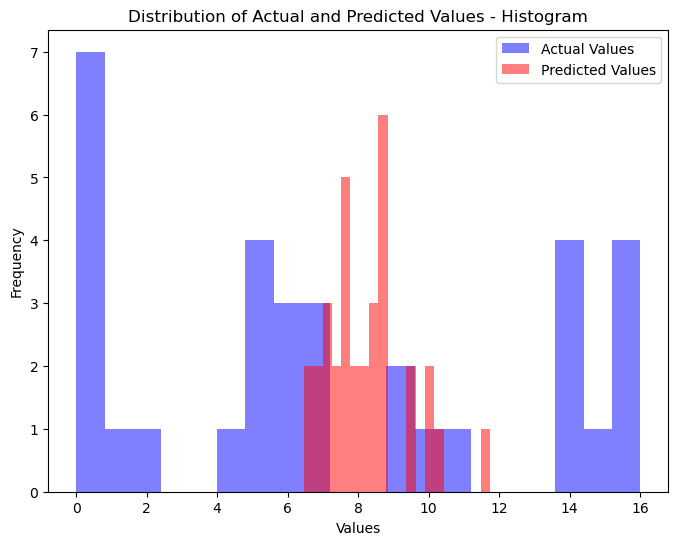

In [87]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Actual Values', color='blue')
plt.hist(y_prediction, bins=20, alpha=0.5, label='Predicted Values', color='red')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Values - Histogram')
plt.legend()
plt.show()


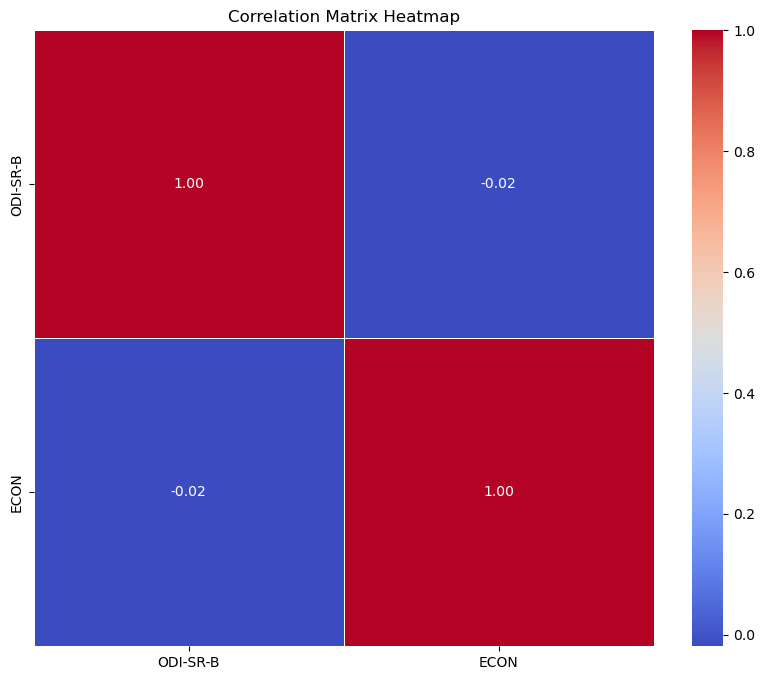

In [88]:
import seaborn as sns

# Compute the correlation matrix
data1=data[['ODI-SR-B','ECON']]
corr_matrix = data1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

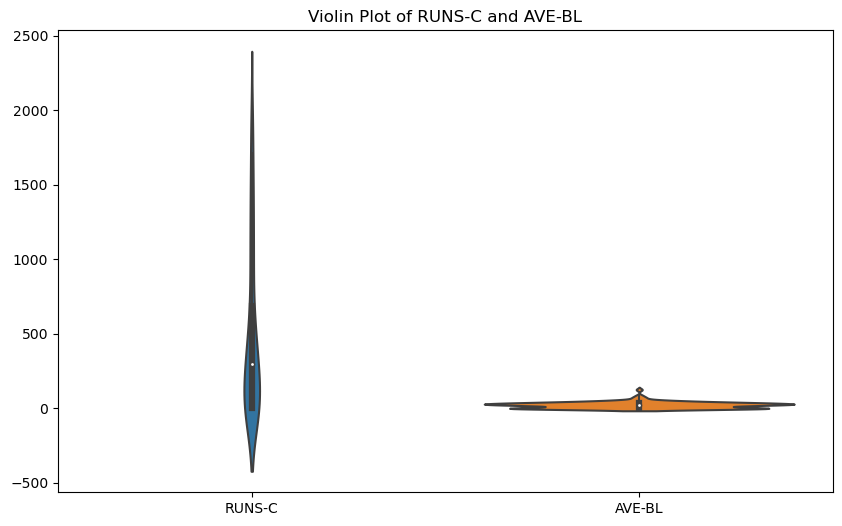

In [89]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(data=data[['RUNS-C', 'AVE-BL']])
plt.title('Violin Plot of RUNS-C and AVE-BL')
plt.show()